In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import os

import numpy as np
import pandas as pd
from astropy.table import Table
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')

from agnfinder import visualise_templates
from agnfinder.forward_model import interpolate_templates

In [4]:
DATA_ROOT='/media/mike/internal/agnfinder'

In [5]:
!ls {DATA_ROOT}

cpz_paper_sample.parquet	       LIBRARY_XXLN_Spirals.lib.dat.fits
LIBRARY_STAR_XXL_North.dat.fits        LIBRARY_XXLN_Starburst.lib.dat.fits
LIBRARY_XXLN_AGN.lib.dat.fits	       README
LIBRARY_XXLN_Ellipticals.lib.dat.fits  uK_IR_final.fits
LIBRARY_XXLN_QSO.lib.dat.fits


## Load Data

In [6]:
starburst = Table.read(os.path.join(DATA_ROOT, 'LIBRARY_XXLN_Starburst.lib.dat.fits')).to_pandas()
len(starburst)

259974

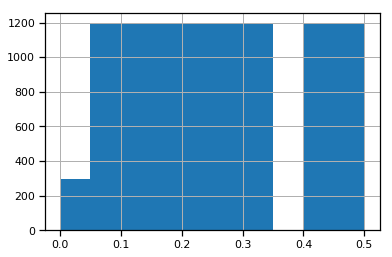

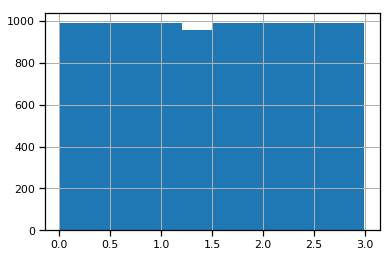

In [17]:
to_interpolate['EB_V'].hist()
plt.figure()
to_interpolate['z'].hist()

## Linear Interpolation

In [8]:
to_interpolate = starburst.query('model == 1').query('z < 3.').query('WISE_1 > 15.')
print(len(to_interpolate))

[ 1  2  3  4  5  6  7  8  9 10 11 12 13]
9867


In [38]:
to_interpolate['WISE_1_scaled'] = to_interpolate['WISE_1'].apply(lambda x: x ** 10)  # to show the range better

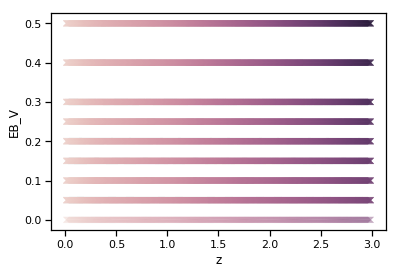

In [39]:
fig, ax = plt.subplots()
# ax.contourf(z_axis, eb_v_axis, grid)
# ax.scatter(*np.meshgrid(z_axis, eb_v_axis), marker='x', alpha=0.5sns.scatterplot(data=to_interpolate, y='EB_V', x='z', hue='WISE_1_scaled', marker='x', alpha=0.5, legend=False, ax=ax)

With only 2 continuous model parameters, the model space is well-sampled - especially in redshift.

In [11]:
interp = interpolate_templates(to_interpolate, 'i_sdss')

In [12]:
interp((0.2, 2.))

array(32.94619998)

In [44]:
z_samples = np.linspace(0.01, 2.99, 100)  # cannot be on edge
eb_v_samples = np.linspace(0.01, 0.499, 100)  # cannot be on edge
z, eb_v = np.meshgrid(z_samples, eb_v_samples)
interpolated_grid = interp((eb_v, z))

Text(0, 0.5, 'Interpolated W1 Mag')

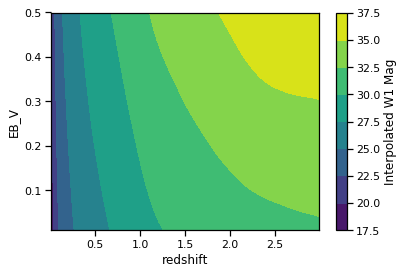

In [48]:
fig, ax = plt.subplots()
contours = ax.contourf(z_samples, eb_v_samples, interpolated_grid)  # X, Y, Z format
ax.set_xlabel('redshift')
ax.set_ylabel('EB_V')
cbar = plt.colorbar(contours)
cbar.ax.set_ylabel('Interpolated W1 Mag')

Interpolation looks pretty good vs. what I would guess from the scatterplot above.